In [67]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [68]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

In [69]:
file_path='/content/drive/MyDrive/Ai final assignment/BankNote_Authentication.csv'

In [70]:
data = pd.read_csv(file_path)
data.head(10)

,variance,skewness,curtosis,entropy,class
0,3.62160,8.6661,-2.80730,-0.44699,0
1,4.54590,8.1674,-2.45860,-1.46210,0
2,3.86600,-2.6383,1.92420,0.10645,0
3,3.45660,9.5228,-4.01120,-3.59440,0
4,0.32924,-4.4552,4.57180,-0.98880,0
5,4.36840,9.6718,-3.96060,-3.16250,0
6,3.59120,3.0129,0.72888,0.56421,0
7,2.09220,-6.8100,8.46360,-0.60216,0
8,3.20320,5.7588,-0.75345,-0.61251,0
9,1.53560,9.1772,-2.27180,-0.73535,0


In [71]:
print("\nMissing Values:")
print(data.isnull().sum())


Missing Values:
variance    0
skewness    0
curtosis    0
entropy     0
class       0
dtype: int64


In [72]:
print("\nSummary Statistics:")
print(data.describe())


Summary Statistics:
          variance     skewness     curtosis      entropy        class
count  1372.000000  1372.000000  1372.000000  1372.000000  1372.000000
mean      0.433735     1.922353     1.397627    -1.191657     0.444606
std       2.842763     5.869047     4.310030     2.101013     0.497103
min      -7.042100   -13.773100    -5.286100    -8.548200     0.000000
25%      -1.773000    -1.708200    -1.574975    -2.413450     0.000000
50%       0.496180     2.319650     0.616630    -0.586650     0.000000
75%       2.821475     6.814625     3.179250     0.394810     1.000000
max       6.824800    12.951600    17.927400     2.449500     1.000000


In [73]:
print("\nUnique Values in Categorical Columns:")
for col in data.select_dtypes(include=['object']).columns:
    print(f"{col}: {data[col].nunique()} unique values")


Unique Values in Categorical Columns:


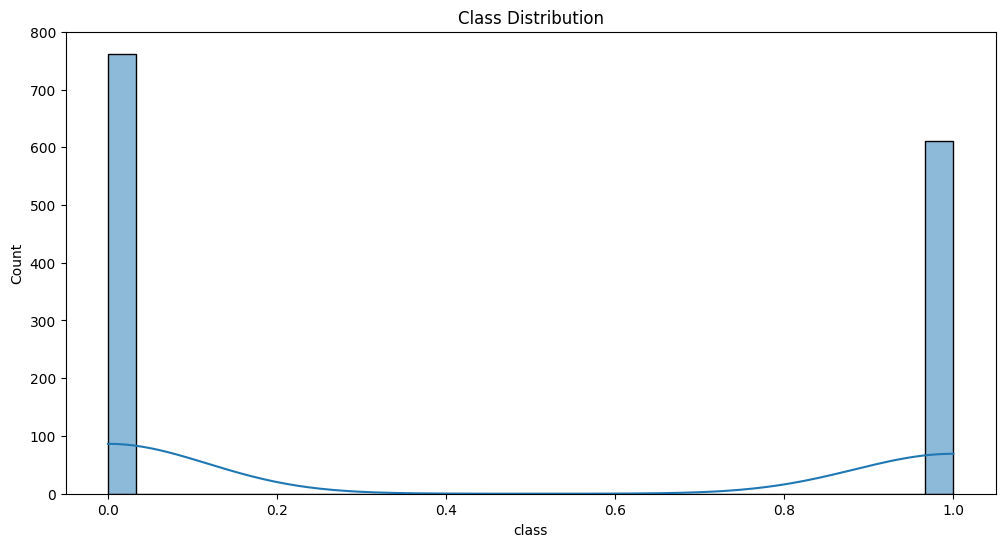

In [74]:
# prompt: plt.figure(figsize=(12, 6))
# sns.histplot(data['class'], bins=30, kde=True)
# plt.title("Price Distribution")
# plt.show()
# what should be here according to my dataset

import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
sns.histplot(data['class'], bins=30, kde=True)
plt.title("Class Distribution") # Changed title to reflect 'class' column
plt.show()


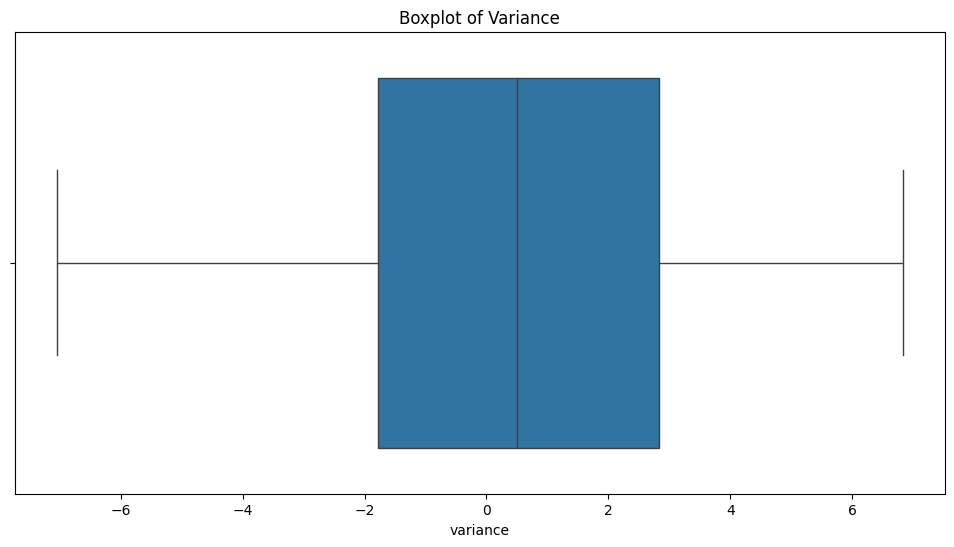

In [75]:
# prompt: plt.figure(figsize=(12, 6))
# sns.boxplot(x=data[''])
# plt.title("Boxplot of Price")
# plt.show()
# what should be here according to my dataset

import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
sns.boxplot(x=data['variance']) # Assuming you want a boxplot of the 'variance' column
plt.title("Boxplot of Variance") # Changed title to reflect 'variance' column
plt.show()


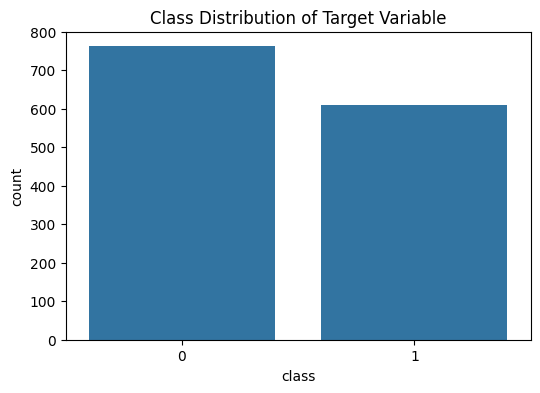

In [76]:
# prompt: plt.figure(figsize=(6, 4))
# sns.countplot(x=data['price_category'])
# plt.title("Class Distribution of Target Variable")
# plt.show()
# what should be here according to my dataset

import matplotlib.pyplot as plt
plt.figure(figsize=(6, 4))
sns.countplot(x=data['class']) # Use 'class' column for the countplot
plt.title("Class Distribution of Target Variable")
plt.show()


In [77]:
# Convert 'object' columns to numeric representation before calculating correlation
for col in data.select_dtypes(include=['object']).columns:
    # If the column is 'model', handle it separately (e.g., using one-hot encoding)
    if col == 'model':
        # Example: Create dummy variables for 'model' column
        dummies = pd.get_dummies(data['model'], prefix='model')
        data = pd.concat([data, dummies], axis=1)
        data = data.drop('model', axis=1) # Drop the original 'model' column
    # For other 'object' columns, attempt to convert to numeric using pd.to_numeric
    # with errors='coerce' to handle non-convertible values
    else:
        #data[col] = pd.to_numeric(data[col], errors='coerce')
        data[col] = pd.to_numeric(data[col], errors='coerce').fillna(0) # Fill NaN with 0

In [78]:
le = LabelEncoder()
data['class_encoded'] = le.fit_transform(data['class'])

# Drop the original 'price_category' column
data = data.drop('class', axis=1)

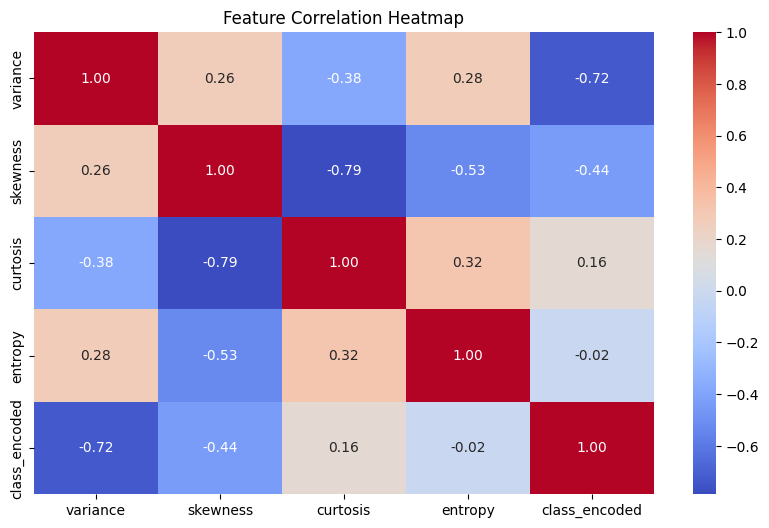

In [79]:
plt.figure(figsize=(10, 6))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()

In [80]:
print("\nEDA Completed.")


EDA Completed.


In [81]:
data.head(10)

,variance,skewness,curtosis,entropy,class_encoded
0,3.62160,8.6661,-2.80730,-0.44699,0
1,4.54590,8.1674,-2.45860,-1.46210,0
2,3.86600,-2.6383,1.92420,0.10645,0
3,3.45660,9.5228,-4.01120,-3.59440,0
4,0.32924,-4.4552,4.57180,-0.98880,0
5,4.36840,9.6718,-3.96060,-3.16250,0
6,3.59120,3.0129,0.72888,0.56421,0
7,2.09220,-6.8100,8.46360,-0.60216,0
8,3.20320,5.7588,-0.75345,-0.61251,0
9,1.53560,9.1772,-2.27180,-0.73535,0


In [82]:
def logistic_function(x):
  """
  Computes the logistic function applied to any value of x.
  Arguments:
    x: scalar or numpy array of any size.
  Returns:
    y: logistic function applied to x.
  """
  # Ensure x is a NumPy array to avoid errors with individual float values
  #x = np.array(x)  # This line is causing the issue when x is already a NumPy array
  # Instead, check if x is already a NumPy array before converting it
  if not isinstance(x, np.ndarray):
    x = np.array(x)
  y = 1 / (1 + np.exp(-x))
  return y

In [83]:
def test_logistic_function():
    """
    Test cases for the logistic_function.
    """
    # Test with scalar input
    x_scalar = 0
    expected_output_scalar = round(1 / (1 + np.exp(0)), 3)  # Expected output: 0.5
    assert round(logistic_function(x_scalar), 3) == expected_output_scalar, "Test failed for scalar input"

    # Test with positive scalar input
    x_pos = 2
    expected_output_pos = round(1 / (1 + np.exp(-2)), 3)  # Expected output: ~0.881
    assert round(logistic_function(x_pos), 3) == expected_output_pos, "Test failed for positive scalar input"

    # Test with negative scalar input
    x_neg = -3
    expected_output_neg = round(1 / (1 + np.exp(3)), 3)  # Expected output: ~0.047
    assert round(logistic_function(x_neg), 3) == expected_output_neg, "Test failed for negative scalar input"

    # Test with numpy array input
    x_array = np.array([0, 2, -3])
    expected_output_array = np.array([0.5, 0.881, 0.047])  # Adjusted expected values rounded to 3 decimals
    # Use np.round to round the array element-wise and compare
    assert np.all(np.round(logistic_function(x_array), 3) == expected_output_array), "Test failed for numpy array input"

    print("All tests passed!")

# Run the test case
test_logistic_function()

All tests passed!


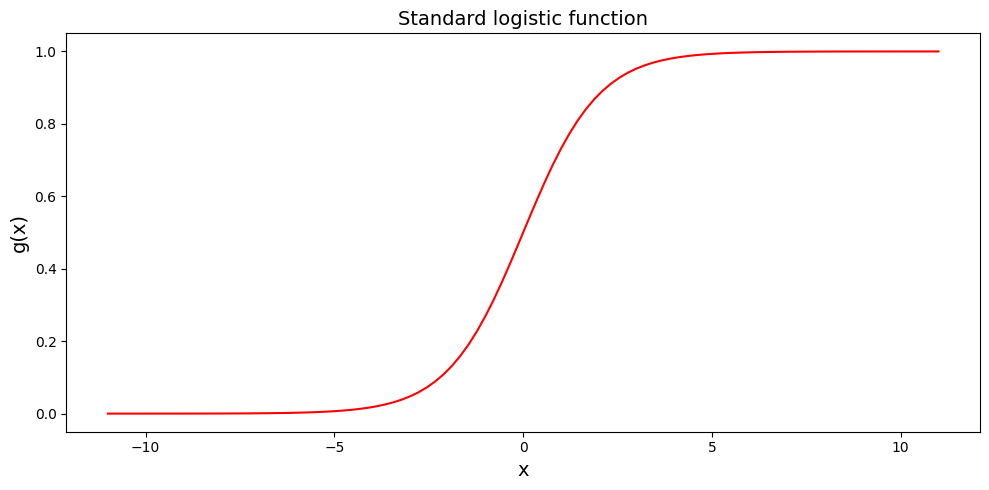

In [84]:
# Plooting the sigmoid function:
import matplotlib.pyplot as plt
import numpy as np
plt.figure(figsize = (10, 5))
x = np.linspace(-11, 11, 100)
plt.plot(x, logistic_function(x), color = 'red')
plt.xlabel("x", fontsize = 14)
plt.ylabel("g(x)", fontsize = 14)
plt.title("Standard logistic function", fontsize = 14)
plt.tight_layout()
plt.show()

In [85]:
def log_loss(y_true, y_pred):
  """
  Computes log loss for true target value y ={0 or 1} and predicted target value y' inbetween {0-1}.
  Arguments:
    y_true (scalar): true target value {0 or 1}.
    y_pred (scalar): predicted taget value {0-1}.
  Returns:
    loss (float): loss/error value
  """
  import numpy as np
  # Ensure y_pred is clipped to avoid log(0)
  y_pred = np.clip(y_pred, 1e-10, 1 - 1e-10)
  loss = - (y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))
  return loss

In [86]:
# Test function:
y_true, y_pred = 0, 0.1
print(f'log loss({y_true}, {y_pred}) ==> {log_loss(y_true, y_pred)}')
print("+++++++++++++--------------------------++++++++++++++++++++++++")
y_true, y_pred = 1, 0.9
print(f'log loss({y_true}, {y_pred}) ==> {log_loss(y_true, y_pred)}')

log loss(0, 0.1) ==> 0.10536051565782628
+++++++++++++--------------------------++++++++++++++++++++++++
log loss(1, 0.9) ==> 0.10536051565782628


In [87]:
# Test function:for
y_true, y_pred = 0, 0.9
print(f'log loss({y_true}, {y_pred}) ==> {log_loss(y_true, y_pred)}')
print("+++++++++++++--------------------------++++++++++++++++++++++++")
y_true, y_pred = 1, 0.1
print(f'log loss({y_true}, {y_pred}) ==> {log_loss(y_true, y_pred)}')

log loss(0, 0.9) ==> 2.302585092994046
+++++++++++++--------------------------++++++++++++++++++++++++
log loss(1, 0.1) ==> 2.3025850929940455


In [88]:
def test_log_loss():
    """
    Test cases for the log_loss function.
    """
    import numpy as np

    # Test case 1: Perfect prediction (y_true = 1, y_pred = 1)
    y_true = 1
    y_pred = 1
    expected_loss = 0.0  # Log loss is 0 for perfect prediction
    assert np.isclose(log_loss(y_true, y_pred), expected_loss), "Test failed for perfect prediction (y_true=1, y_pred=1)"

    # Test case 2: Perfect prediction (y_true = 0, y_pred = 0)
    y_true = 0
    y_pred = 0
    expected_loss = 0.0  # Log loss is 0 for perfect prediction
    assert np.isclose(log_loss(y_true, y_pred), expected_loss), "Test failed for perfect prediction (y_true=0, y_pred=0)"

    # Test case 3: Incorrect prediction (y_true = 1, y_pred = 0)
    y_true = 1
    y_pred = 0
    try:
        log_loss(y_true, y_pred)  # This should raise an error due to log(0)
    except ValueError:
        pass  # Test passed if ValueError is raised for log(0)

    # Test case 4: Incorrect prediction (y_true = 0, y_pred = 1)
    y_true = 0
    y_pred = 1
    try:
        log_loss(y_true, y_pred)  # This should raise an error due to log(0)
    except ValueError:
        pass  # Test passed if ValueError is raised for log(0)

    # Test case 5: Partially correct prediction
    y_true = 1
    y_pred = 0.8
    expected_loss = -(1 * np.log(0.8)) - (0 * np.log(0.2))  # ~0.2231
    assert np.isclose(log_loss(y_true, y_pred), expected_loss, atol=1e-6), "Test failed for partially correct prediction (y_true=1, y_pred=0.8)"

    y_true = 0
    y_pred = 0.2
    expected_loss = -(0 * np.log(0.2)) - (1 * np.log(0.8))  # ~0.2231
    assert np.isclose(log_loss(y_true, y_pred), expected_loss, atol=1e-6), "Test failed for partially correct prediction (y_true=0, y_pred=0.2)"

    print("All tests passed!")

# Run the test case
test_log_loss()


All tests passed!


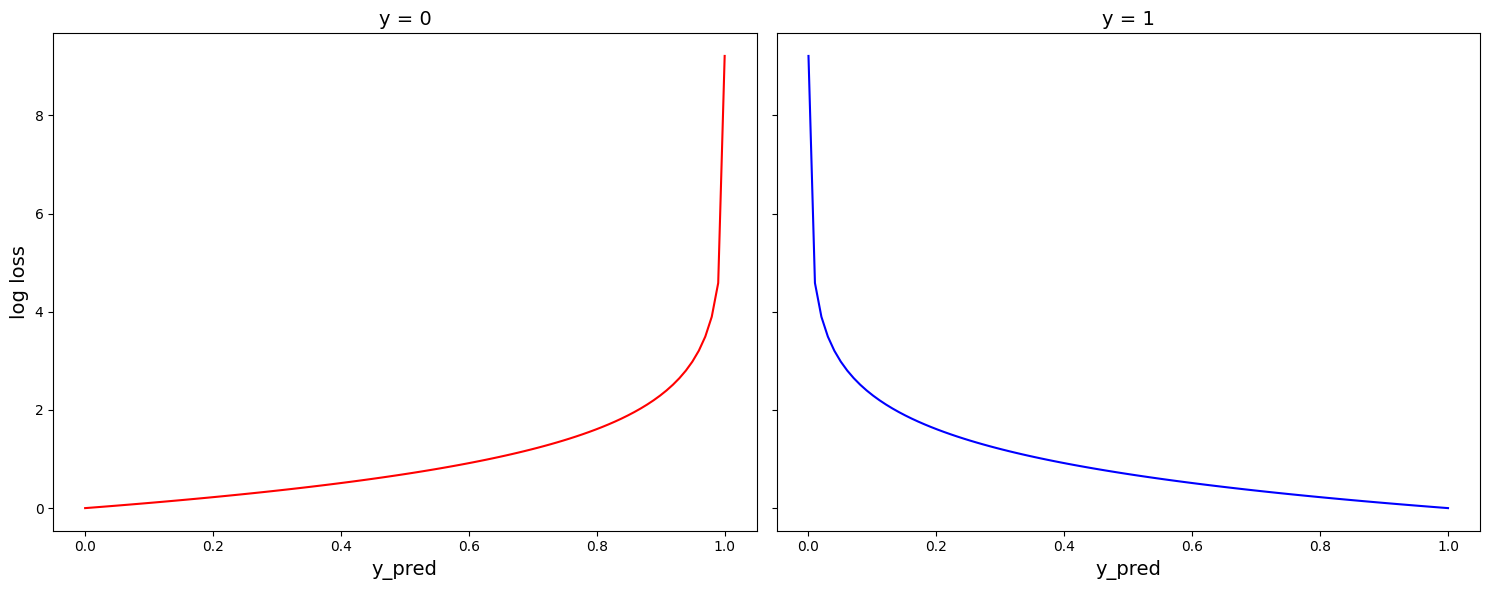

In [89]:
# Plot the loss Function:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 2, figsize = (15, 6), sharex = True, sharey = True)
y_pred = np.linspace(0.0001, 0.9999, 100)
ax[0].plot(y_pred, log_loss(0, y_pred), color = 'red')
ax[0].set_title("y = 0", fontsize = 14)
ax[0].set_xlabel("y_pred", fontsize = 14)
ax[0].set_ylabel("log loss", fontsize = 14)
ax[1].plot(y_pred, log_loss(1, y_pred), color = 'blue')
ax[1].set_title("y = 1", fontsize = 14)
ax[1].set_xlabel("y_pred", fontsize = 14)
plt.tight_layout()
plt.show()

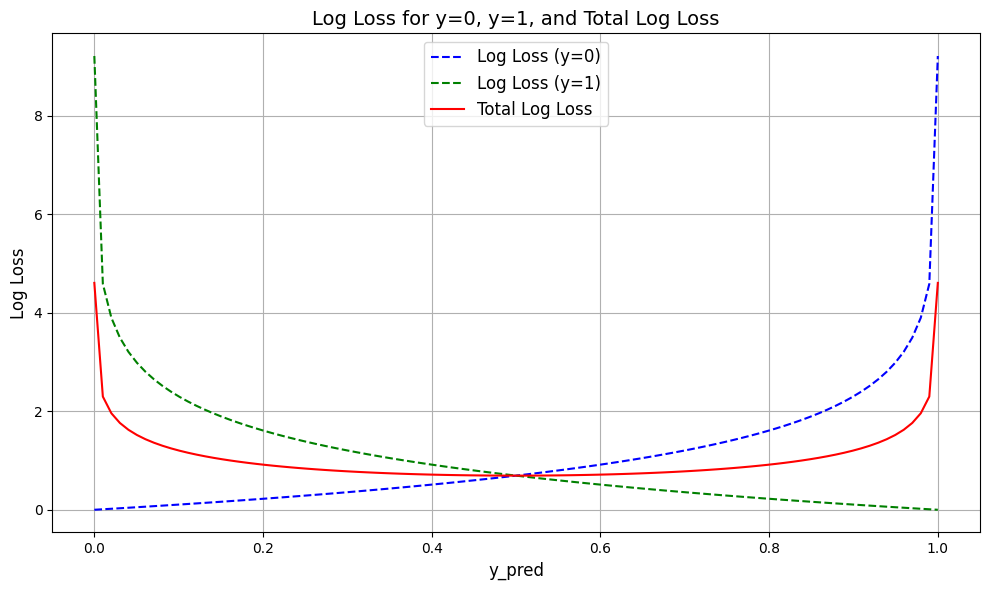

In [90]:
y_pred = np.linspace(0.0001, 0.9999, 100)

# Compute log losses for y = 0 and y = 1
log_loss_0 = log_loss(0, y_pred)
log_loss_1 = log_loss(1, y_pred)

# Compute total log loss as a weighted sum (assuming equal weights here for simplicity)
total_log_loss = 0.5 * log_loss_0 + 0.5 * log_loss_1

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(y_pred, log_loss_0, label="Log Loss (y=0)", color="blue", linestyle="--")
plt.plot(y_pred, log_loss_1, label="Log Loss (y=1)", color="green", linestyle="--")
plt.plot(y_pred, total_log_loss, label="Total Log Loss", color="red")
plt.title("Log Loss for y=0, y=1, and Total Log Loss", fontsize=14)
plt.xlabel("y_pred", fontsize=12)
plt.ylabel("Log Loss", fontsize=12)
plt.legend(fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()

In [91]:
# Cost function - using vectorization
def cost_function(y_true, y_pred):
    """
    Computes log loss for inputs true value (0 or 1) and predicted value (between 0 and 1)
    Args:
      y_true    (array_like, shape (m,)): array of true values (0 or 1)
      y_pred (array_like, shape (m,)): array of predicted values (probability of y_pred being 1)
    Returns:
      cost (float): nonnegative cost corresponding to y_true and y_pred
    """
    assert len(y_true) == len(y_pred), "Length of true values and length of predicted values do not match"
    n = len(y_true)
    loss_vec = - (y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))
    cost = np.sum(loss_vec) / n
    return cost

y_true, y_pred = np.array([0, 1, 0]), np.array([0.4, 0.6, 0.25])
print(f"cost_function({y_true}, {y_pred}) = {cost_function(y_true, y_pred)}")

cost_function([0 1 0], [0.4  0.6  0.25]) = 0.43644443999458743


In [92]:
# Function to compute cost function in terms of model parameters - using vectorization
def costfunction_logreg(X, y, w, b):
    """
    Computes the cost function, given data and model parameters.
    Args:
      X (ndarray, shape (m,n)): data on features, m observations with n features.
      y (array_like, shape (m,)): array of true values of target (0 or 1).
      w (array_like, shape (n,)): weight parameters of the model.
      b (float): bias parameter of the model.
    Returns:
      cost (float): nonnegative cost corresponding to y and y_pred.
    """
    m, n = X.shape
    assert len(y) == m, "Number of feature observations and number of target observations do not match."
    assert len(w) == n, "Number of features and number of weight parameters do not match."

    # Compute z using np.dot
    z = np.dot(X, w) + b
    # Compute predictions using logistic function (sigmoid)
    y_pred = 1 / (1 + np.exp(-z))

    # Compute the cost using the cost function
    cost = cost_function(y, y_pred)

    return cost
X, y, w, b = np.array([[10, 20], [-10, 10]]), np.array([1, 0]), np.array([0.5, 1.5]), 1
print(f"cost for logistic regression(X = {X}, y = {y}, w = {w}, b = {b}) = {costfunction_logreg(X, y, w, b)}")


cost for logistic regression(X = [[ 10  20]
 [-10  10]], y = [1 0], w = [0.5 1.5], b = 1) = 5.500008350784906


In [93]:
def compute_gradient(X, y, w, b):
    """
    Computes gradients of the cost function with respect to model parameters.
    Args:
      X (ndarray, shape (n,d)): Input data, n observations with d features
      y (array_like, shape (n,)): True labels (0 or 1)
      w (array_like, shape (d,)): Weight parameters of the model
      b (float): Bias parameter of the model
    Returns:
      grad_w (array_like, shape (d,)): Gradients of the cost function with respect to the weight parameters
      grad_b (float): Gradient of the cost function with respect to the bias parameter
    """
    n, d = X.shape  # X has shape (n, d)
    assert len(y) == n, f"Expected y to have {n} elements, but got {len(y)}"
    assert len(w) == d, f"Expected w to have {d} elements, but got {len(w)}"

    # Compute predictions using logistic function (sigmoid)
    y_pred = logistic_function(np.dot(X, w) + b)  # Compute z = X * w + b

    # Compute gradients
    grad_w = np.dot(X.T, (y_pred - y)) / n
    grad_b = np.sum(y_pred - y) / n

    return grad_w, grad_b

In [94]:
def gradient_descent(X, y, w, b, alpha, n_iter, show_cost=False, show_params=True):
    """
    Implements batch gradient descent to optimize logistic regression parameters.

    Args:
      X (ndarray, shape (n,d)): Data on features, n observations with d features
      y (array_like, shape (n,)): True values of target (0 or 1)
      w (array_like, shape (d,)): Initial weight parameters
      b (float): Initial bias parameter
      alpha (float): Learning rate
      n_iter (int): Number of iterations
      show_cost (bool): If True, displays cost every 100 iterations
      show_params (bool): If True, displays parameters every 100 iterations

    Returns:
      w (array_like, shape (d,)): Optimized weight parameters
      b (float): Optimized bias parameter
      cost_history (list): List of cost values over iterations
      params_history (list): List of parameters (w, b) over iterations
    """
    n, d = X.shape
    assert len(y) == n, "Number of observations in X and y do not match"
    assert len(w) == d, "Number of features in X and w do not match"

    cost_history = []
    params_history = []

    for i in range(n_iter):
        # Compute gradients
        grad_w, grad_b = compute_gradient(X, y, w, b)
        # Update weights and bias
        w -= alpha * grad_w
        b -= alpha * grad_b
        # Compute cost
        cost = costfunction_logreg(X, y, w, b)

        # Store cost and parameters
        cost_history.append(cost)
        params_history.append((w.copy(), b))

        # Optionally print cost and parameters
        if show_cost and (i % 100 == 0 or i == n_iter - 1):
            print(f"Iteration {i}: Cost = {cost:.6f}")
        if show_params and (i % 100 == 0 or i == n_iter - 1):
            print(f"Iteration {i}: w = {w}, b = {b:.6f}")

    return w, b, cost_history, params_history


# Test the gradient_descent function with sample data
X = np.array([[0.1, 0.2], [-0.1, 0.1]])  # Shape (2, 2)
y = np.array([1, 0])                     # Shape (2,)
w = np.zeros(X.shape[1])                 # Shape (2,) - same as number of features
b = 0.0                                  # Scalar
alpha = 0.1                              # Learning rate
n_iter = 100000                           # Number of iterations

# Perform gradient descent
w_out, b_out, cost_history, params_history = gradient_descent(X, y, w, b, alpha, n_iter, show_cost=True, show_params=False)

# Print final parameters and cost
print("\nFinal parameters:")
print(f"w: {w_out}, b: {b_out}")
print(f"Final cost: {cost_history[-1]:.6f}")

Iteration 0: Cost = 0.692835
Iteration 100: Cost = 0.662662
Iteration 200: Cost = 0.634332
Iteration 300: Cost = 0.607704
Iteration 400: Cost = 0.582671
Iteration 500: Cost = 0.559128
Iteration 600: Cost = 0.536977
Iteration 700: Cost = 0.516126
Iteration 800: Cost = 0.496487
Iteration 900: Cost = 0.477978
Iteration 1000: Cost = 0.460524
Iteration 1100: Cost = 0.444052
Iteration 1200: Cost = 0.428497
Iteration 1300: Cost = 0.413797
Iteration 1400: Cost = 0.399895
Iteration 1500: Cost = 0.386736
Iteration 1600: Cost = 0.374272
Iteration 1700: Cost = 0.362457
Iteration 1800: Cost = 0.351248
Iteration 1900: Cost = 0.340607
Iteration 2000: Cost = 0.330495
Iteration 2100: Cost = 0.320880
Iteration 2200: Cost = 0.311730
Iteration 2300: Cost = 0.303016
Iteration 2400: Cost = 0.294710
Iteration 2500: Cost = 0.286789
Iteration 2600: Cost = 0.279228
Iteration 2700: Cost = 0.272007
Iteration 2800: Cost = 0.265104
Iteration 2900: Cost = 0.258502
Iteration 3000: Cost = 0.252182
Iteration 3100: Cost

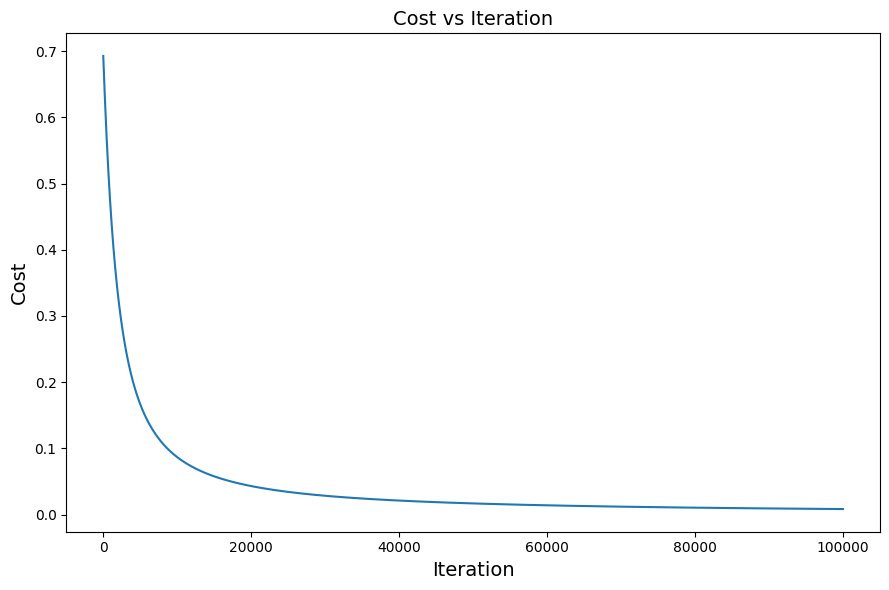

In [95]:
# Plotting cost over iteration
plt.figure(figsize = (9, 6))
plt.plot(cost_history)
plt.xlabel("Iteration", fontsize = 14)
plt.ylabel("Cost", fontsize = 14)
plt.title("Cost vs Iteration", fontsize = 14)
plt.tight_layout()
plt.show()

In [96]:

def prediction(X, w, b, threshold=0.5):
    """
    Predicts binary outcomes for given input features based on logistic regression parameters.

    Arguments:
      X (ndarray, shape (n,d)): Array of test independent variables (features) with n samples and d features.
      w (ndarray, shape (d,)): Array of weights learned via gradient descent.
      b (float): Bias learned via gradient descent.
      threshold (float, optional): Classification threshold for predicting class labels. Default is 0.5.

    Returns:
      y_pred (ndarray, shape (n,)): Array of predicted dependent variable (binary class labels: 0 or 1).
    """
    # Compute the predicted probabilities using the logistic function
    y_test_prob = 1 / (1 + np.exp(-(np.dot(X, w) + b)))

    # Classify based on the threshold
    y_pred = (y_test_prob >= threshold).astype(int)

    return y_pred

In [97]:


def test_prediction():
    X_test = np.array([[0.5, 1.0], [1.5, -0.5], [-0.5, -1.0]])  # Shape (3, 2)
    w_test = np.array([1.0, -1.0])                              # Shape (2,)
    b_test = 0.0                                                # Scalar bias
    threshold = 0.5                                             # Default threshold

    # Updated expected output
    expected_output = np.array([0, 1, 1])

    # Call the prediction function
    y_pred = prediction(X_test, w_test, b_test, threshold)

    # Assert that the output matches the expected output
    assert np.array_equal(y_pred, expected_output), f"Expected {expected_output}, but got {y_pred}"

    print("Test passed!")

test_prediction()

Test passed!


In [98]:
X = data.drop('class_encoded', axis=1)
y = data['class_encoded']

# Split data into training and testing sets manually
test_size = 0.2  # Example: 20% for testing
split_index = int(len(data) * (1 - test_size))
X_train = X[:split_index]
X_test = X[split_index:]
y_train = y[:split_index]
y_test = y[split_index:]


In [99]:
def evaluate_classification(y_true, y_pred):
    TP = np.sum((y_true == 1) & (y_pred == 1))  # True Positives
    TN = np.sum((y_true == 0) & (y_pred == 0))
    FP = np.sum((y_true == 0) & (y_pred == 1))
    FN = np.sum((y_true == 1) & (y_pred == 0))
    # Confusion matrix
    confusion_matrix = np.array([[TN, FP],
                                  [FN, TP]])
    # Precision, recall, and F1-score with safe handling of zero division
    precision = TP / (TP + FP) if (TP + FP) > 0 else 0.0
    recall = TP / (TP + FN) if (TP + FN) > 0 else 0.0
    # Calculate f1_score here
    f1_score = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0.0
    # Ensure metrics are floats
    precision = float(precision)
    recall = float(recall)
    f1_score = float(f1_score) # Now convert to float after calculation
    # Return metrics as a dictionary
    return confusion_matrix, precision, recall, f1_score


In [100]:
# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [101]:
# Initialize parameters
w = np.zeros(X_train_scaled.shape[1])
b = 0.0
alpha = 0.1
n_iter = 1000

In [102]:
print("\nTraining Logistic Regression Model:")
w, b, cost_history,params_history = gradient_descent(X_train_scaled, y_train.values, w, b, alpha, n_iter, show_cost=True, show_params=False)



Training Logistic Regression Model:
Iteration 0: Cost = 0.675328
Iteration 100: Cost = 0.272746
Iteration 200: Cost = 0.193957
Iteration 300: Cost = 0.155298
Iteration 400: Cost = 0.132254
Iteration 500: Cost = 0.116952
Iteration 600: Cost = 0.106033
Iteration 700: Cost = 0.097829
Iteration 800: Cost = 0.091422
Iteration 900: Cost = 0.086265
Iteration 999: Cost = 0.082054


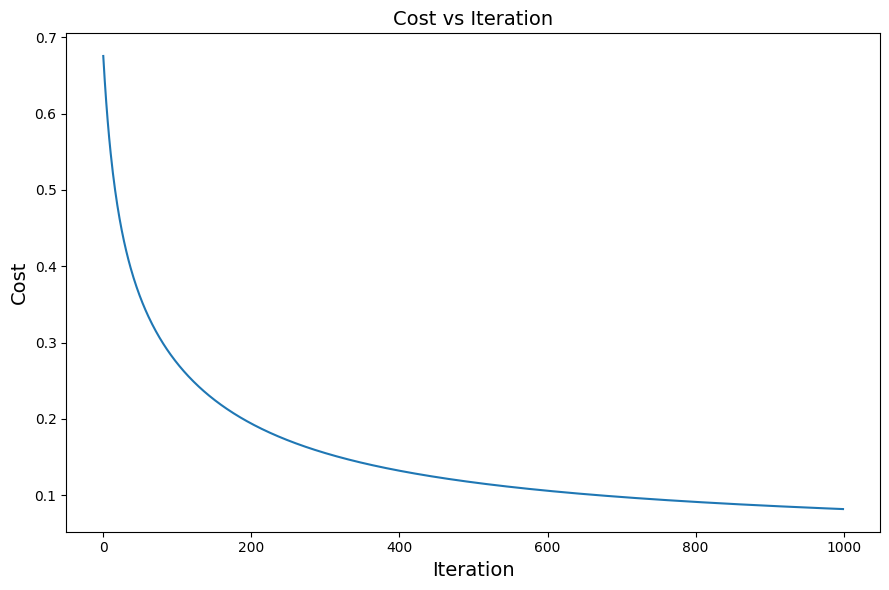

In [103]:
# Plot cost history
plt.figure(figsize=(9, 6))
plt.plot(cost_history)
plt.xlabel("Iteration", fontsize=14)
plt.ylabel("Cost", fontsize=14)
plt.title("Cost vs Iteration", fontsize=14)
plt.tight_layout()
plt.show()

In [104]:
y_train_pred = prediction(X_train_scaled, w, b)
y_test_pred = prediction(X_test_scaled, w, b)


In [105]:
train_cost = costfunction_logreg(X_train_scaled, y_train.values, w, b)
test_cost = costfunction_logreg(X_test_scaled, y_test.values, w, b)
print(f"\nTrain Loss (Cost): {train_cost:.4f}")
print(f"Test Loss (Cost): {test_cost:.4f}")



Train Loss (Cost): 0.0821
Test Loss (Cost): 0.0945


In [106]:
# Accuracy on test data
test_accuracy = np.mean(y_test_pred == y_test) * 100
print(f"\nTest Accuracy: {test_accuracy:.2f}%")

# Evaluation
confusion_matrix, precision, recall, f1_score = evaluate_classification(y_test, y_test_pred)
print(f"\nConfusion Matrix:\n{confusion_matrix}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1_score:.2f}")



Test Accuracy: 99.27%

Confusion Matrix:
[[  0   0]
 [  2 273]]
Precision: 1.00
Recall: 0.99
F1-Score: 1.00


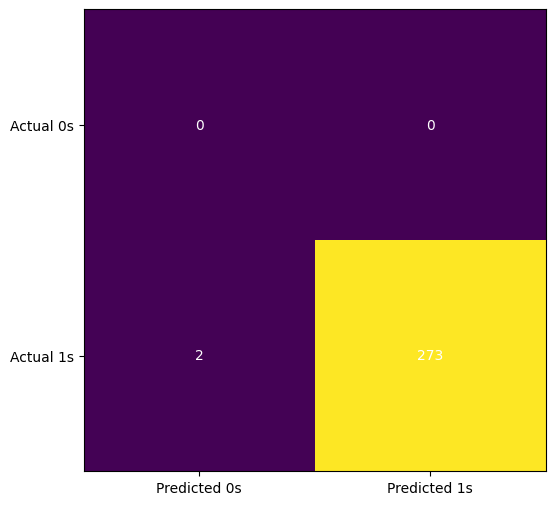

In [107]:
# Visualizing Confusion Matrix
fig, ax = plt.subplots(figsize=(6, 6))
ax.imshow(confusion_matrix)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, confusion_matrix[i, j], ha='center', va='center', color='white')
plt.show()


In [108]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, accuracy_score


In [110]:
# Assuming 'data' is your pandas DataFrame with features (X) and target (y)
# and 'price_category_encoded' is the target variable.

# Split data into training and testing sets using scikit-learn's train_test_split
X = data.drop('class_encoded', axis=1)
y = data['class_encoded']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # Use random_state for reproducibility



In [111]:
# Standardize features using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [112]:
# Initialize and train the Logistic Regression model
logreg = LogisticRegression(random_state=42) # Use random_state for reproducibility
logreg.fit(X_train_scaled, y_train)

LogisticRegression(random_state=42)

In [113]:
# Make predictions on the test set
y_pred = logreg.predict(X_test_scaled)

In [114]:
# Evaluate the model
print("Evaluation Metrics:")
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print(f"Precision: {precision_score(y_test, y_pred)}")
print(f"Recall: {recall_score(y_test, y_pred)}")
print(f"F1-Score: {f1_score(y_test, y_pred)}")

Evaluation Metrics:
Accuracy: 0.9781818181818182
Precision: 0.9689922480620154
Recall: 0.984251968503937
F1-Score: 0.9765625


In [115]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(cm)


Confusion Matrix:
[[144   4]
 [  2 125]]


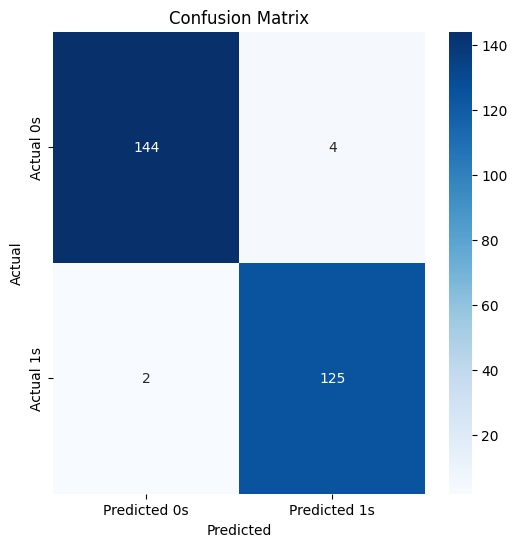

In [116]:
# Visualizing the confusion matrix
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=['Predicted 0s', 'Predicted 1s'],
            yticklabels=['Actual 0s', 'Actual 1s'])
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [117]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

In [118]:
# Initialize and train the Naive Bayes model
nb_classifier = GaussianNB()
nb_classifier.fit(X_train_scaled, y_train)

GaussianNB()

In [119]:
# Make predictions on the test set
y_pred_nb = nb_classifier.predict(X_test_scaled)

In [120]:
# Evaluate the Naive Bayes model
print("\nNaive Bayes Model Evaluation:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_nb)}")
print(f"Precision: {precision_score(y_test, y_pred_nb)}")
print(f"Recall: {recall_score(y_test, y_pred_nb)}")
print(f"F1-Score: {f1_score(y_test, y_pred_nb)}")


Naive Bayes Model Evaluation:
Accuracy: 0.8072727272727273
Precision: 0.8557692307692307
Recall: 0.7007874015748031
F1-Score: 0.7705627705627706


In [121]:
# Confusion Matrix for Naive Bayes
cm_nb = confusion_matrix(y_test, y_pred_nb)
print("\nConfusion Matrix (Naive Bayes):")
print(cm_nb)


Confusion Matrix (Naive Bayes):
[[133  15]
 [ 38  89]]


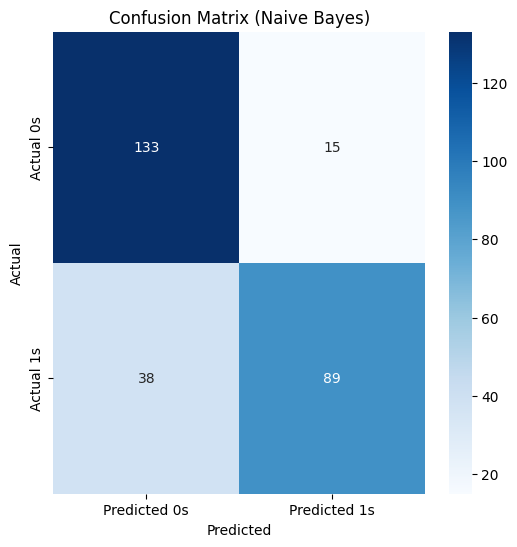

In [122]:
# Visualizing the confusion matrix for Naive Bayes
plt.figure(figsize=(6, 6))
sns.heatmap(cm_nb, annot=True, fmt="d", cmap="Blues",
            xticklabels=['Predicted 0s', 'Predicted 1s'],
            yticklabels=['Actual 0s', 'Actual 1s'])
plt.title('Confusion Matrix (Naive Bayes)')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [126]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import log_loss


# Assuming X_train, y_train, X_test, y_test are defined from your data
# Example:
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Define the parameter grid for Logistic Regression
logreg_params = {
    "C": [0.001, 0.01, 0.1, 1, 10, 100],
    "penalty": ['l1', 'l2'],
    "solver": ['liblinear', 'saga']  # Add solvers for l1 penalty
}

# Perform GridSearchCV for Logistic Regression
logreg_grid = GridSearchCV(LogisticRegression(max_iter=10000),  # Increase max_iter if needed
                          logreg_params, cv=5, scoring="accuracy", n_jobs=-1)
logreg_grid.fit(X_train, y_train)

# Get the best estimator and print hyperparameters
best_logreg = logreg_grid.best_estimator_
print("Best Logistic Regression Hyperparameters:", logreg_grid.best_params_)

# Make predictions and evaluate
y_pred_logreg = best_logreg.predict(X_test)
accuracy = accuracy_score(y_test, y_pred_logreg)
precision = precision_score(y_test, y_pred_logreg)
recall = recall_score(y_test, y_pred_logreg)
f1 = f1_score(y_test, y_pred_logreg)

# Calculate log loss
y_pred_prob = best_logreg.predict_proba(X_test)
logloss = log_loss(y_test, y_pred_prob)


print(f"Logistic Regression Performance: Accuracy = {accuracy:.4f}, Precision = {precision:.4f}, Recall = {recall:.4f}, F1-Score = {f1:.4f}, Log Loss = {logloss:.4f}")

Best Logistic Regression Hyperparameters: {'C': 10, 'penalty': 'l1', 'solver': 'liblinear'}
Logistic Regression Performance: Accuracy = 0.9855, Precision = 0.9843, Recall = 0.9843, F1-Score = 0.9843, Log Loss = 0.0319


In [127]:
import numpy as np
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV

# Assuming X_train_scaled and y_train are defined from your data preprocessing steps

# Define the parameter grid for Naive Bayes
param_grid_nb = {
    'var_smoothing': np.logspace(0,-9, num=100)
}

# Perform GridSearchCV for Naive Bayes
nb_grid_search = GridSearchCV(estimator=GaussianNB(),
                             param_grid=param_grid_nb,
                             cv=5, scoring='accuracy', n_jobs=-1)
nb_grid_search.fit(X_train_scaled, y_train)

# Print the best hyperparameters for Naive Bayes
print("\nBest hyperparameters for Naive Bayes:")
print(nb_grid_search.best_params_)

# Now you can use the best estimator from the grid search:
best_nb_model = nb_grid_search.best_estimator_


Best hyperparameters for Naive Bayes:
{'var_smoothing': 0.012328467394420659}


In [128]:
!pip install scikit-learn
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectFromModel

# Assuming X_train, y_train, and X are defined as in your code.

# 1. Initialize and train a LogisticRegression model
logreg = LogisticRegression(random_state=42, max_iter=1000)  # Increase max_iter if needed
logreg.fit(X_train, y_train)

# 2. Use SelectFromModel for feature selection
sfm_logreg = SelectFromModel(logreg, threshold="median")  # Use the trained logreg here
sfm_logreg.fit(X_train, y_train)

# 3. Get the selected features and their column names
selected_features_logreg = sfm_logreg.get_support()
selected_columns_logreg = X.columns[selected_features_logreg]

# 4. Print the selected features
print("Selected features using Logistic Regression:")
print(selected_columns_logreg)

# 5. (Optional) Create a new DataFrame with only the selected features
X_train_selected = X_train[selected_columns_logreg]
X_test_selected = X_test[selected_columns_logreg]

Selected features using Logistic Regression:
Index(['variance', 'curtosis'], dtype='object')


In [129]:
from sklearn.naive_bayes import GaussianNB
from sklearn.feature_selection import SelectFromModel

# Assuming X_train, y_train, and X are defined

# 1. Initialize and fit GaussianNB for feature selection
# Note: We need to calculate feature importance for GaussianNB manually
gnb = GaussianNB()
gnb.fit(X_train, y_train)
feature_importances = np.abs(gnb.theta_[1] - gnb.theta_[0])  # Calculate feature importance based on class means

# 2. Assign calculated feature importances to the estimator
gnb.feature_importances_ = feature_importances  # Assign feature importances directly to the estimator

# 3. Use SelectFromModel for feature selection with calculated importances
sfm_nb = SelectFromModel(
    estimator=gnb,  # Pass the fitted GaussianNB model with feature importances
    threshold="median",
    prefit=True,  # Indicate that the estimator is already fitted
    importance_getter="feature_importances_"  # Use calculated importances
)

# 3. Get selected features and their names
selected_features_nb = sfm_nb.get_support()
selected_columns_nb = X.columns[selected_features_nb]

# 4. Print the selected features
print("Selected Features using Naive Bayes:")
print(selected_columns_nb)

# 5. (Optional) Create new DataFrames with selected features
X_train_selected_nb = X_train[selected_columns_nb]
X_test_selected_nb = X_test[selected_columns_nb]

Selected Features using Naive Bayes:
Index(['variance', 'skewness'], dtype='object')


In [130]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Assuming X_train, y_train, X_test, y_test, and X are defined

# 1. Initialize and train a LogisticRegression model for feature selection
logreg_selector = LogisticRegression(random_state=42, max_iter=1000)  # Increase max_iter if needed
logreg_selector.fit(X_train, y_train)

# 2. Use SelectFromModel for feature selection
sfm_logreg = SelectFromModel(logreg_selector, threshold="median")  # Use the trained logreg_selector here
sfm_logreg.fit(X_train, y_train)

# 3. Get the selected features and their column names
selected_features_logreg = sfm_logreg.get_support()
selected_columns_logreg = X.columns[selected_features_logreg]

# 4. Print the selected features
print("Selected features using Logistic Regression:")
print(selected_columns_logreg)

# 5. Transform the data to include only selected features
X_train_logreg_selected = sfm_logreg.transform(X_train)
X_test_logreg_selected = sfm_logreg.transform(X_test)

# 6. Initialize and train a LogisticRegression model with selected features
logreg_model = LogisticRegression(random_state=42, max_iter=1000)
logreg_model.fit(X_train_logreg_selected, y_train)

# 7. Make predictions and evaluate
y_pred_logreg = logreg_model.predict(X_test_logreg_selected)
accuracy = accuracy_score(y_test, y_pred_logreg)
precision = precision_score(y_test, y_pred_logreg)
recall = recall_score(y_test, y_pred_logreg)
f1 = f1_score(y_test, y_pred_logreg)

print(f"Logistic Regression-Selected Features Performance: Accuracy = {accuracy:.4f}, Precision = {precision:.4f}, Recall = {recall:.4f}, F1-Score = {f1:.4f}")

Selected features using Logistic Regression:
Index(['variance', 'curtosis'], dtype='object')
Logistic Regression-Selected Features Performance: Accuracy = 0.8327, Precision = 0.8189, Recall = 0.8189, F1-Score = 0.8189


In [132]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Assuming X_train, y_train, X_test, y_test, and X are defined

# 1. Initialize and train a LogisticRegression model with L1 penalty for feature selection
lasso_selector = LogisticRegression(penalty='l1', solver='liblinear', random_state=42, max_iter=1000)
lasso_selector.fit(X_train, y_train)

# 2. Use SelectFromModel for feature selection
sfm_lasso = SelectFromModel(lasso_selector, threshold="median")
sfm_lasso.fit(X_train, y_train)

# 3. Get the selected features and their column names
selected_features_lasso = sfm_lasso.get_support()
selected_columns_lasso = X.columns[selected_features_lasso]

# 4. Print the selected features
print("Selected features using Lasso:")
print(selected_columns_lasso)

# 5. Transform the data to include only selected features
X_train_lasso_selected = sfm_lasso.transform(X_train)
X_test_lasso_selected = sfm_lasso.transform(X_test)

# 6. Initialize and train a LogisticRegression model with selected features
logreg_model_lasso = LogisticRegression(random_state=42, max_iter=1000)
logreg_model_lasso.fit(X_train_lasso_selected, y_train)

# 7. Make predictions and evaluate
y_pred_lasso = logreg_model_lasso.predict(X_test_lasso_selected)
accuracy = accuracy_score(y_test, y_pred_lasso)
precision = precision_score(y_test, y_pred_lasso)
recall = recall_score(y_test, y_pred_lasso)
f1 = f1_score(y_test, y_pred_lasso)

print(f"Lasso-Selected Features Performance: Accuracy = {accuracy:.4f}, Precision = {precision:.4f}, Recall = {recall:.4f}, F1-Score = {f1:.4f}")

Selected features using Lasso:
Index(['variance', 'curtosis'], dtype='object')
Lasso-Selected Features Performance: Accuracy = 0.8327, Precision = 0.8189, Recall = 0.8189, F1-Score = 0.8189
